# Project 1: Data Cleaning, Exploration and Visualization

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pokemon = pd.read_csv("Pokemon.csv")

In [4]:
pokemon

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


## Cleaning the data

In [6]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


In [7]:
pokemon.isnull().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [8]:
pokemon.fillna("Sem Tipo", inplace=True)

pokemon.isnull().sum()

number        0
name          0
type1         0
type2         0
total         0
hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
generation    0
legendary     0
dtype: int64

In [9]:
pokemon["type1"].value_counts()

type1
Water        136
Normal       117
Grass         94
Bug           83
Psychic       80
Fire          67
Electric      63
Rock          60
Dark          48
Fighting      45
Ghost         43
Poison        42
Ground        42
Dragon        41
Steel         39
Ice           38
Fairy         23
Flying         9
Blastoise      1
Graass         1
Name: count, dtype: int64

Como podemos ver temos 2 erros no type1, graass e blastoise

In [11]:
pokemon["type1"] = pokemon["type1"].str.replace('Graass', 'Grass')

pokemon["type1"] = pokemon["type1"].str.replace('Blastoise', 'Water')

pokemon["type1"].value_counts()

type1
Water       137
Normal      117
Grass        95
Bug          83
Psychic      80
Fire         67
Electric     63
Rock         60
Dark         48
Fighting     45
Ghost        43
Poison       42
Ground       42
Dragon       41
Steel        39
Ice          38
Fairy        23
Flying        9
Name: count, dtype: int64

In [12]:
pokemon["type2"].value_counts()

type2
Sem Tipo    498
Flying      114
Fairy        44
Psychic      43
Poison       41
Ground       39
Steel        36
Dragon       35
Fighting     32
Grass        29
Dark         28
Ghost        26
Water        22
Ice          19
Fire         18
Rock         16
Normal       11
Electric     11
Bug          10
Name: count, dtype: int64

In [13]:
pokemon.name.duplicated().sum()

0

We can see that all the pokemon are unique and no name is repeated¶


In [15]:
# Substituir True por 1 e False por 0
pokemon["legendary"].replace({True: 1, False: 0}, inplace=True)

## Exploring and Visualization of the Data

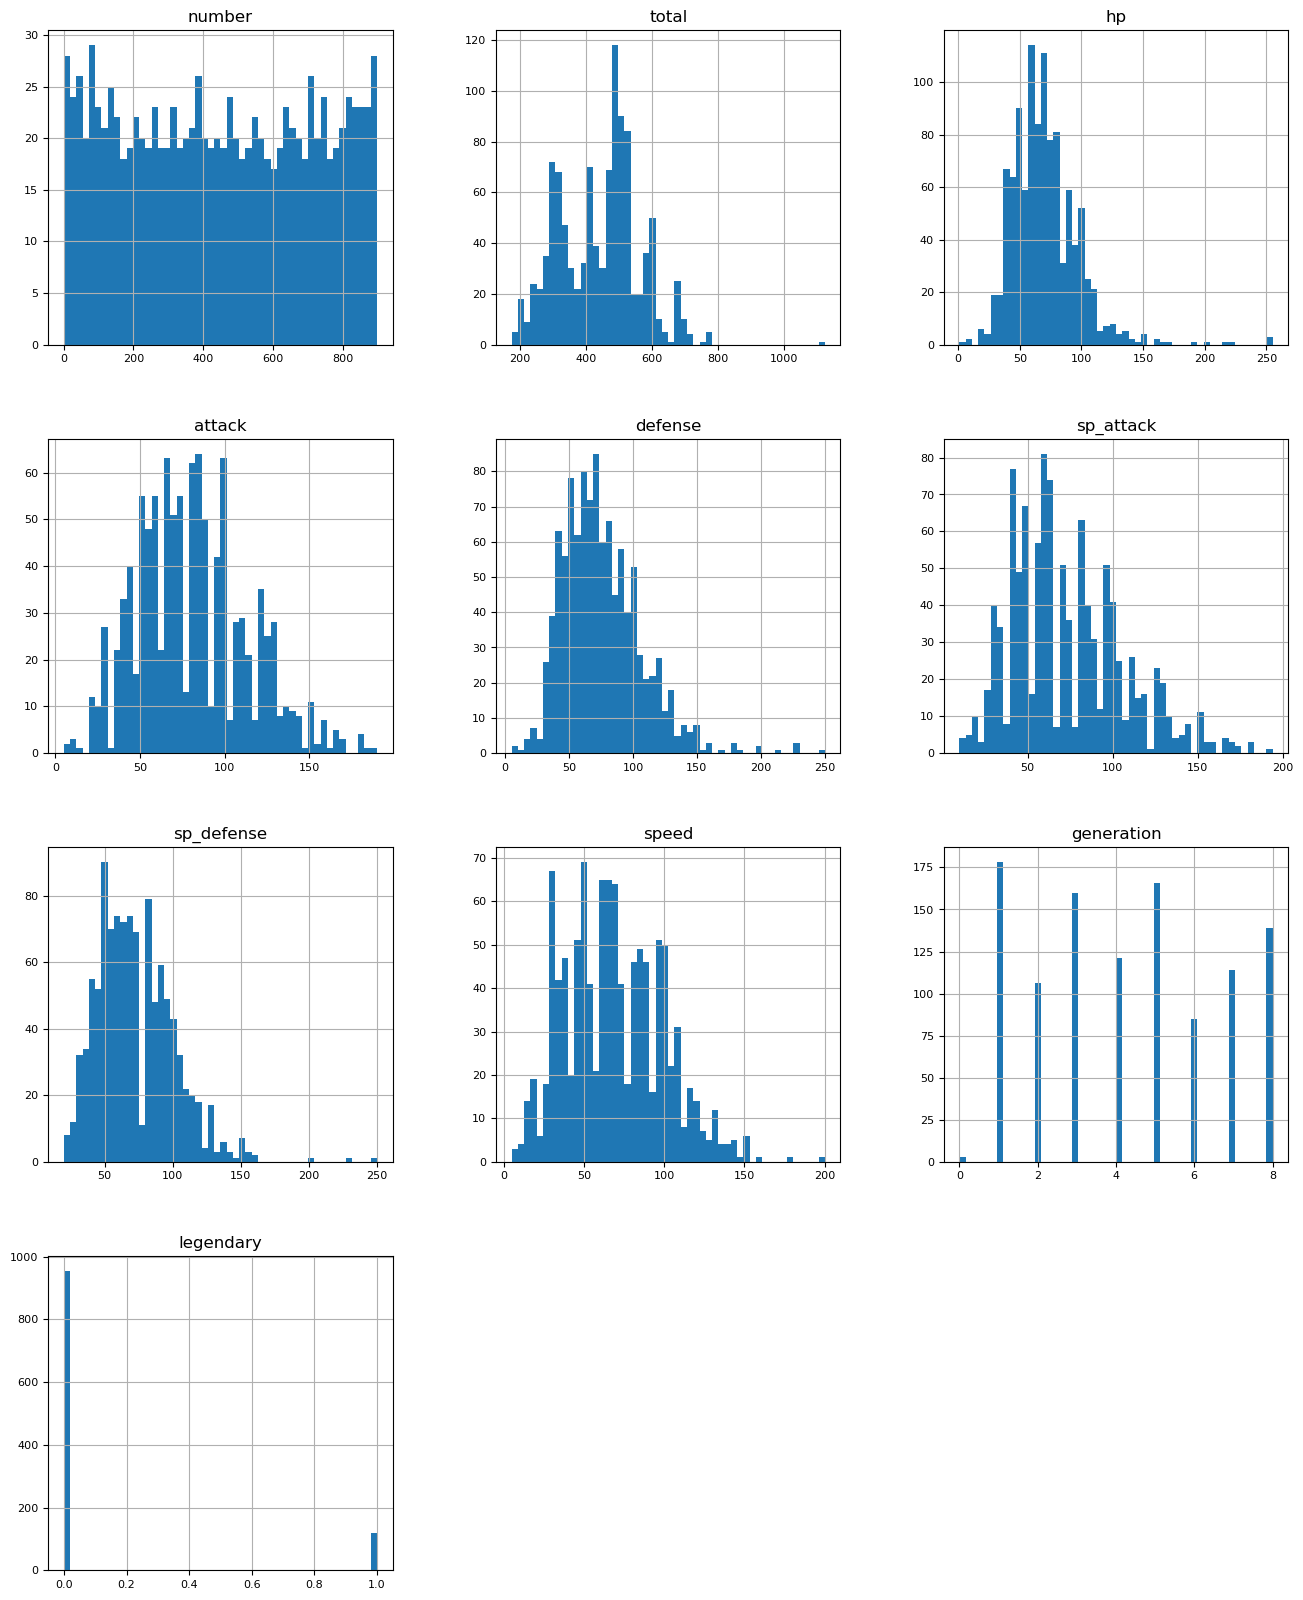

In [17]:
#visualizacao inicial das colunas numericas
pokemon.select_dtypes(include = ['float64', 'int64']).hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

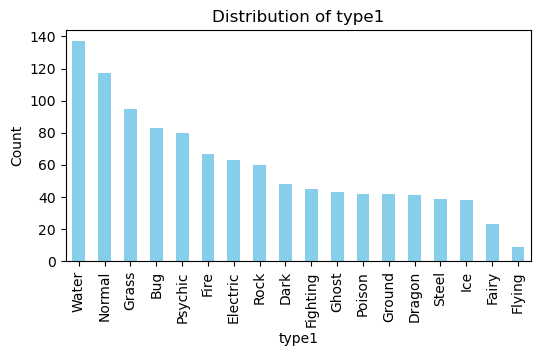

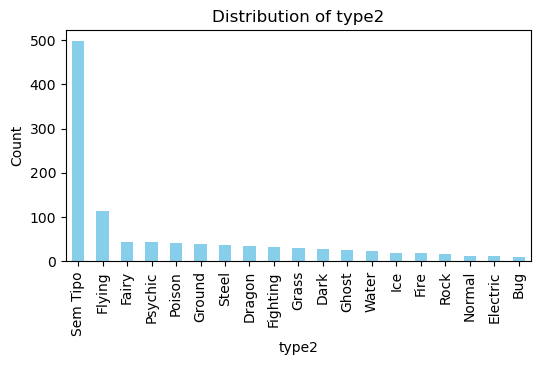

In [18]:
#visualizacao inicial das colunas categoricas
for column in pokemon.select_dtypes(include='object').drop("name", axis=1):
    plt.figure(figsize=(6, 3))
    pokemon[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Highest and Lowest hp

In [20]:
highest_hp = pokemon[pokemon.hp==pokemon.hp.max()].name.value_counts()

lowest_hp = pokemon[pokemon.hp==pokemon.hp.min()].name.value_counts()

print("Pokémon(s) com o maior HP:")
print(highest_hp)

print("\nPokémon(s) com o menor HP:")
print(lowest_hp)

Pokémon(s) com o maior HP:
name
Blissey                1
Eternamax Eternatus    1
Name: count, dtype: int64

Pokémon(s) com o menor HP:
name
Shedinja    1
Name: count, dtype: int64


Highest and lowest attack

In [22]:
highest_attack = pokemon[pokemon.attack==pokemon.attack.max()].name.value_counts()

lowest_attack = pokemon[pokemon.attack==pokemon.attack.min()].name.value_counts()

print("Pokémon(s) com o maior Attack:")
print(highest_attack)

print("\nPokémon(s) com o menor Attack:")
print(lowest_attack)

Pokémon(s) com o maior Attack:
name
Mega Mewtwo X    1
Name: count, dtype: int64

Pokémon(s) com o menor Attack:
name
Chansey    1
Happiny    1
Name: count, dtype: int64


Highest and lowest defense

In [24]:
highest_defense = pokemon[pokemon.defense==pokemon.defense.max()].name.value_counts()

lowest_defense = pokemon[pokemon.defense==pokemon.defense.min()].name.value_counts()

print("Pokémon(s) com o maior Defense:")
print(highest_defense)

print("\nPokémon(s) com o menor Defense:")
print(lowest_defense)

Pokémon(s) com o maior Defense:
name
Eternamax Eternatus    1
Name: count, dtype: int64

Pokémon(s) com o menor Defense:
name
Chansey    1
Happiny    1
Name: count, dtype: int64


Highest and lowest sp_attack

In [26]:
highest_sp_attack = pokemon[pokemon.sp_attack==pokemon.sp_attack.max()].name.value_counts()

lowest_sp_attack = pokemon[pokemon.sp_attack==pokemon.sp_attack.min()].name.value_counts()

print("Pokémon(s) com o maior sp_attack:")
print(highest_sp_attack)

print("\nPokémon(s) com o menor sp_attack:")
print(lowest_sp_attack)

Pokémon(s) com o maior sp_attack:
name
Mega Mewtwo Y    1
Name: count, dtype: int64

Pokémon(s) com o menor sp_attack:
name
Alolan Sandshrew    1
Shuckle             1
Feebas              1
Bonsly              1
Name: count, dtype: int64


Highest and lowest sp_defense

In [28]:
highest_sp_defense = pokemon[pokemon.sp_defense==pokemon.sp_defense.max()].name.value_counts()

lowest_sp_defense = pokemon[pokemon.sp_defense==pokemon.sp_defense.min()].name.value_counts()

print("Pokémon(s) com o maior sp_defense:")
print(highest_sp_defense)

print("\nPokémon(s) com o menor sp_defense:")
print(lowest_sp_defense)

Pokémon(s) com o maior sp_defense:
name
Eternamax Eternatus    1
Name: count, dtype: int64

Pokémon(s) com o menor sp_defense:
name
Caterpie               1
Weedle                 1
Magikarp               1
Igglybuff              1
Carvanha               1
Deoxys Attack Forme    1
Stonjourner            1
Name: count, dtype: int64


Highest and lowest speed

In [30]:
highest_speed = pokemon[pokemon.speed==pokemon.speed.max()].name.value_counts()

lowest_speed = pokemon[pokemon.speed==pokemon.speed.min()].name.value_counts()

print("Pokémon(s) com o maior speed:")
print(highest_speed)

print("\nPokémon(s) com o menor speed:")
print(lowest_speed)

Pokémon(s) com o maior speed:
name
Regieleki    1
Name: count, dtype: int64

Pokémon(s) com o menor speed:
name
Shuckle      1
Munchlax     1
Pyukumuku    1
Name: count, dtype: int64


Scatter plot of Attack vs. Defense: Explore the relationship between attack and defense stats¶


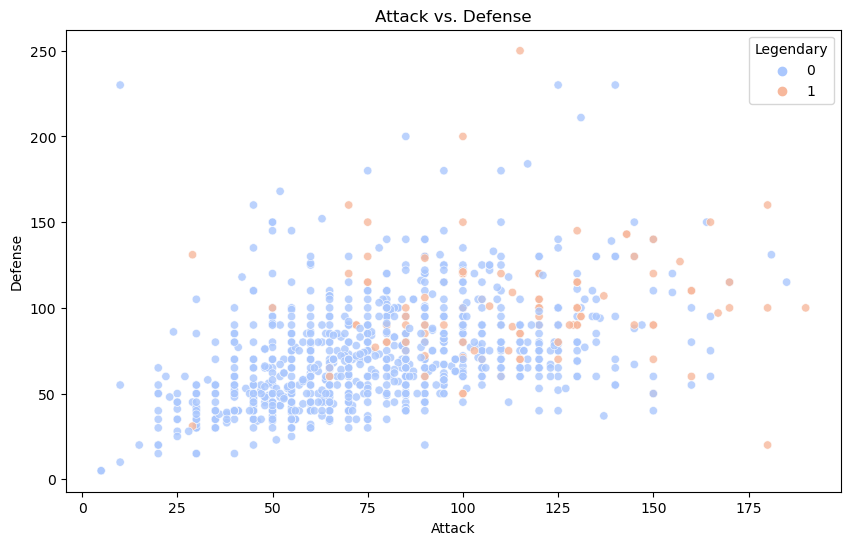

In [32]:
# Scatter plot of Attack vs. Defense
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pokemon, x='attack', y='defense', hue='legendary', palette='coolwarm', alpha=0.8)
plt.title('Attack vs. Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(title='Legendary', loc='upper right')
plt.show()

Violin plot of Defense by Generation: Visualize the distribution of total stats across different generations¶


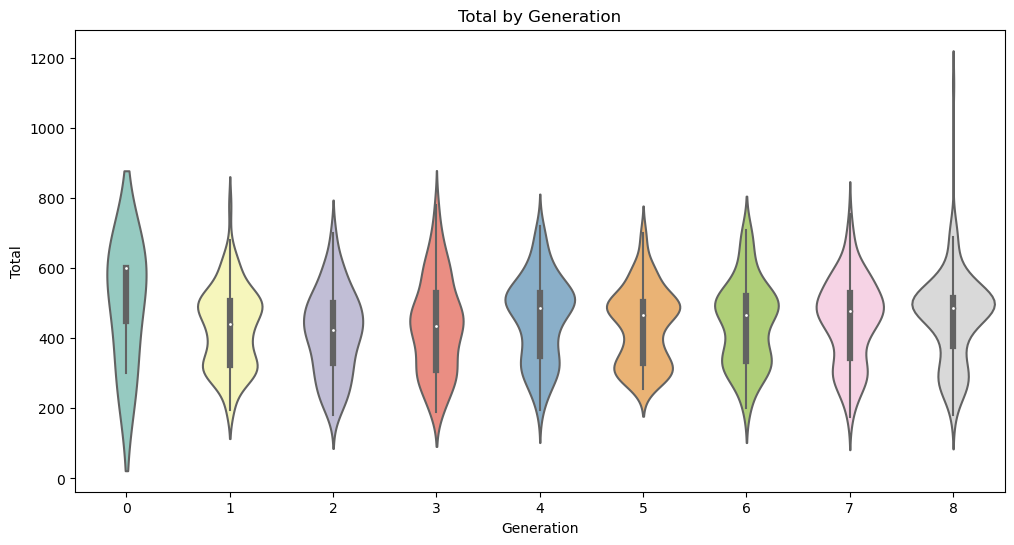

In [34]:
# Violin plot of Defense by Generation
plt.figure(figsize=(12, 6))
sns.violinplot(data=pokemon, x='generation', y='total', palette='Set3')
plt.title('Total by Generation')
plt.xlabel('Generation')
plt.ylabel('Total')
plt.show()

Bar plot of Average Total Stats by Type: Show the average total stats for each type¶


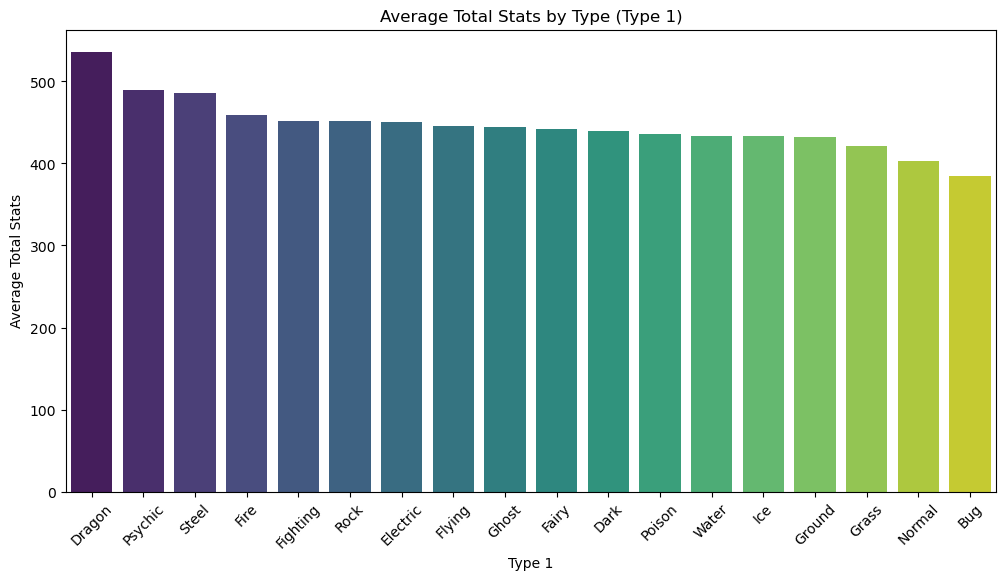

In [36]:
# Bar plot of Average Total Stats by Type
avg_total_by_type = pokemon.groupby('type1')['total'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_total_by_type.index, y=avg_total_by_type.values, palette='viridis')
plt.title('Average Total Stats by Type (Type 1)')
plt.xlabel('Type 1')
plt.ylabel('Average Total Stats')
plt.xticks(rotation=45)
plt.show()

Pairplot of Stats: Explore pairwise relationships between different stats

C:\Users\Diogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Diogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Diogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Diogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

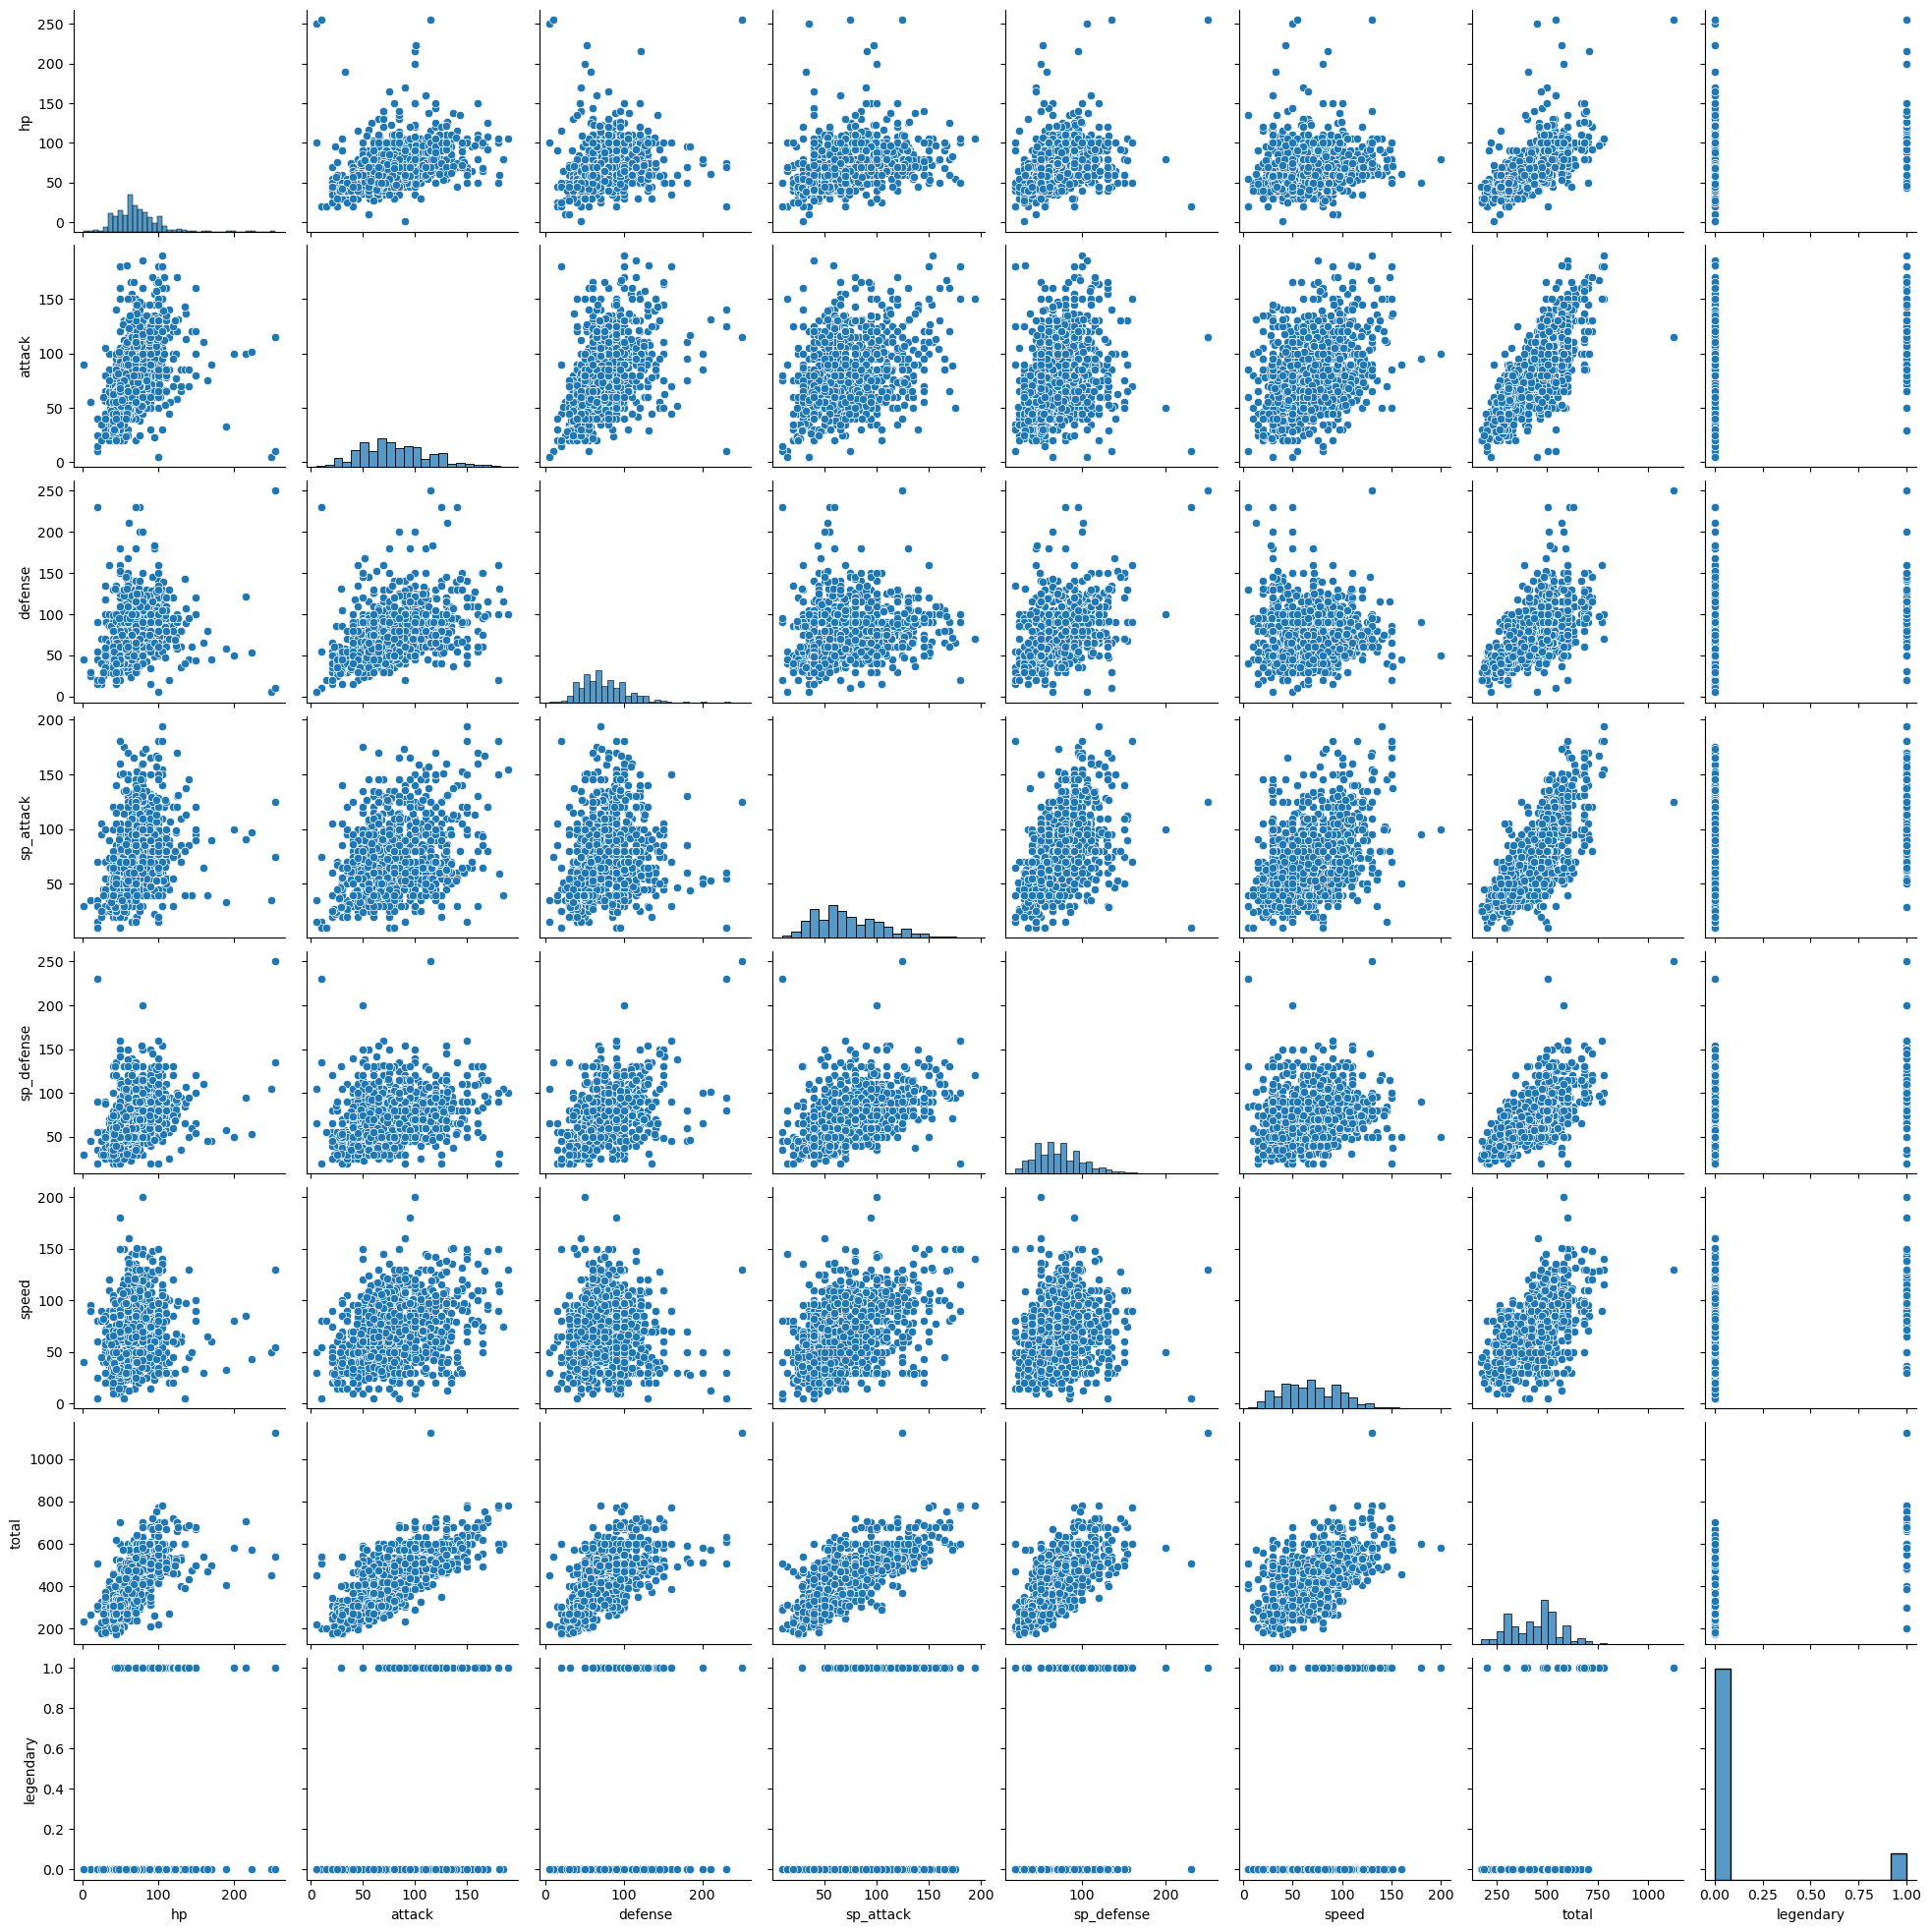

In [38]:
# Pairplot of stats
sns.pairplot(pokemon[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total', 'legendary']])
plt.show()

Heatmap of Correlation Matrix: Visualize the correlation between different stats¶


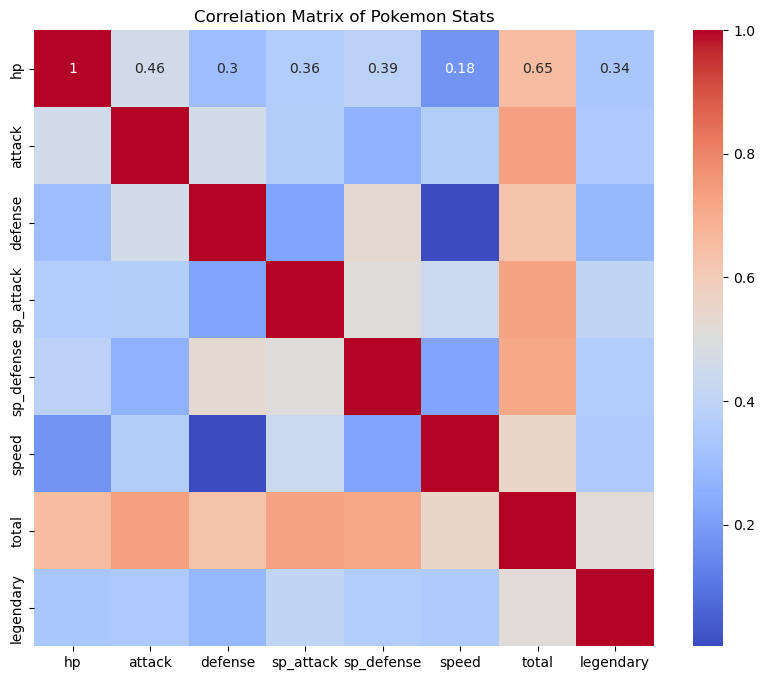

In [40]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pokemon[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total', 'legendary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pokemon Stats')
plt.show()

Box plot of all numeric variables

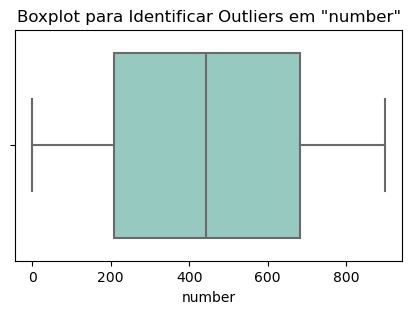

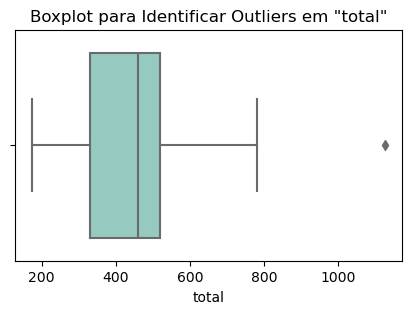

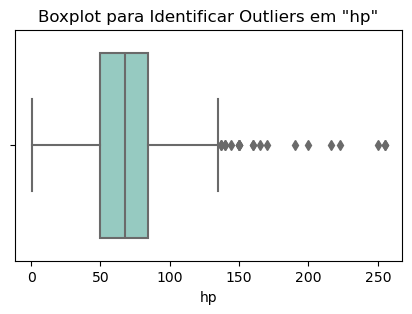

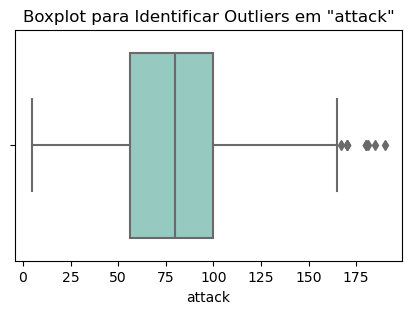

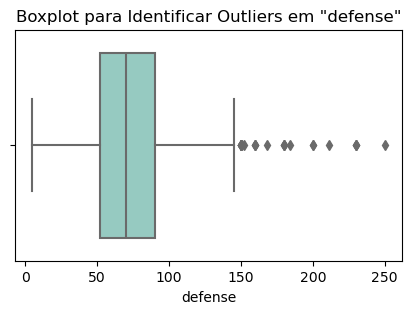

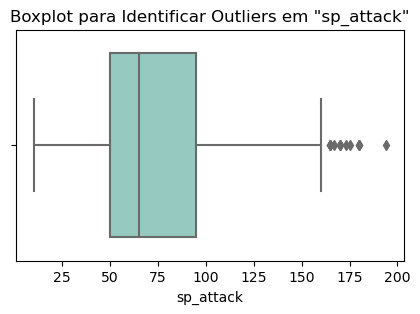

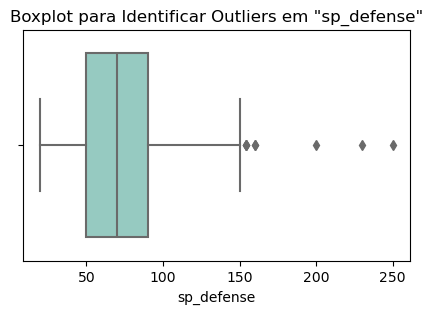

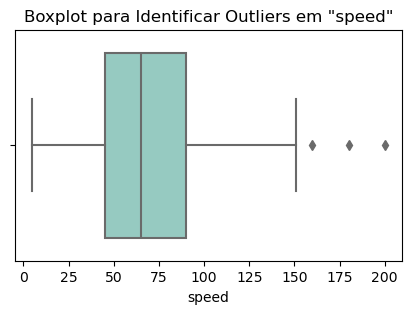

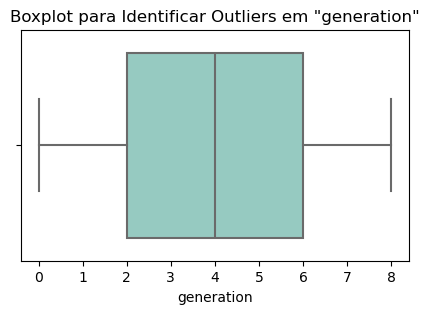

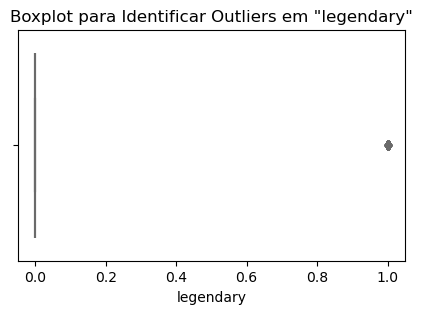

In [42]:
for column in pokemon.select_dtypes(include = ['float64', 'int64']).columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=column, data=pokemon, palette="Set3") 
    plt.title(f'Boxplot para Identificar Outliers em "{column}"')
    plt.show()

# Project 2: Deep learning for binary Classification

## Cluster

In [45]:
pokemon_2 = pokemon.drop(columns=["number", "name", "generation", "legendary", "type1", "type2"])

pokemon_2

,total,hp,attack,defense,sp_attack,sp_defense,speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,525,80,82,83,100,100,80
...,...,...,...,...,...,...,...
1067,580,100,145,130,65,110,30
1068,580,100,65,60,145,80,130
1069,500,100,80,80,80,80,80
1070,680,100,165,150,85,130,50


C:\Users\Diogo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Diogo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Diogo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Diogo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

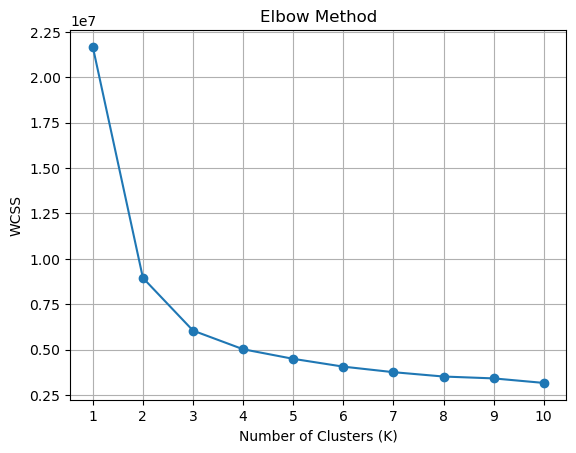

In [46]:
from sklearn.cluster import DBSCAN, KMeans

pokemon_cluster = pokemon_2

wcss = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(pokemon_cluster)
    wcss.append(kmeans.inertia_)

# elbow
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

C:\Users\Diogo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Diogo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Diogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Diogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

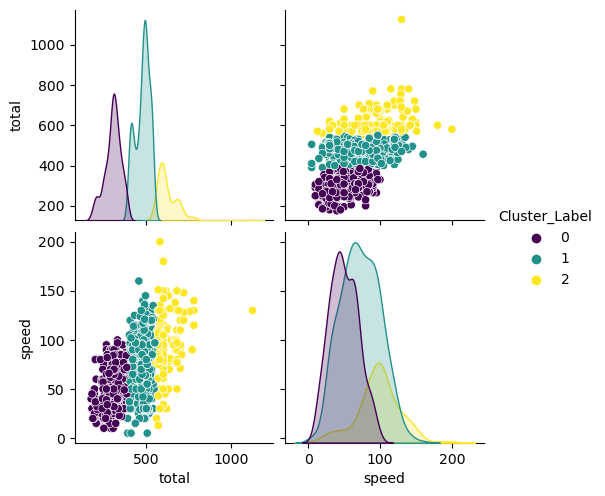

In [47]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(pokemon_cluster)

# cluster labels
cluster_labels = kmeans.labels_

pokemon_cluster['Cluster_Label'] = cluster_labels


# Criar pairplot com clusters
sns.pairplot(pokemon_cluster[['total', 'speed', 'Cluster_Label']], hue='Cluster_Label', palette='viridis')
plt.show()

## Choose a classification model and check the metrics

C:\Users\Diogo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7988 - loss: 0.5898 - val_accuracy: 0.8882 - val_loss: 0.4068
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8845 - loss: 0.4059 - val_accuracy: 0.8882 - val_loss: 0.3140
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9080 - loss: 0.3169 - val_accuracy: 0.8975 - val_loss: 0.2689
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9124 - loss: 0.2779 - val_accuracy: 0.9224 - val_loss: 0.2400
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9136 - loss: 0.2600 - val_accuracy: 0.9255 - val_loss: 0.2155
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9250 - loss: 0.2512 - val_accuracy: 0.9255 - val_loss: 0.2002
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9094 - loss: 0.2126 - val_accuracy: 0.9410 - val_loss: 0.1909
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9181 - loss: 0.2105 - val_accuracy: 0.9410 - val_l

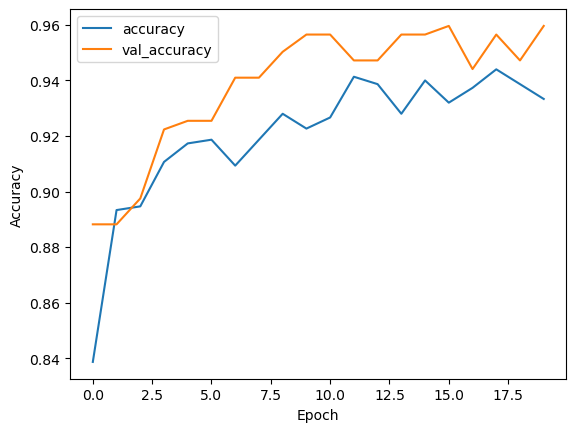

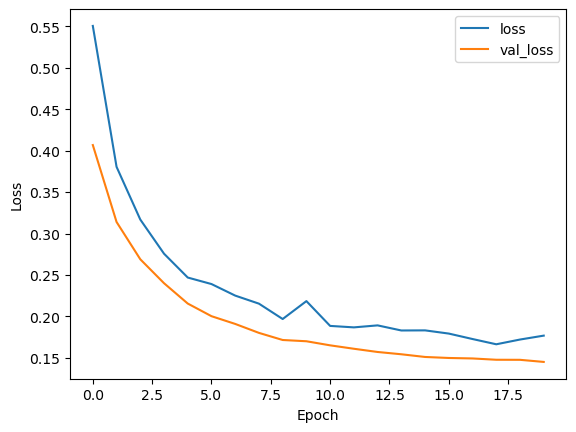

In [49]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

X = pokemon_cluster
Y = pokemon["legendary"]

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.3, random_state=42)

# Definir o modelo sequencial
model = Sequential()

# Adicionar camadas densas
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Camada de entrada
model.add(Dropout(0.5))  # Dropout para evitar overfitting
model.add(Dense(32, activation='relu'))  # Camada oculta
model.add(Dense(1, activation='sigmoid'))  # Camada de saída (binária)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia do modelo: {accuracy}')

# Plotar a acuracy e a perda ao longo do treinamento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [50]:
# Realizar previsões de probabilidade no conjunto de teste
y_pred_prob = model.predict(X_test)

# Aplicar um limiar (por exemplo, 0.5) para obter as classes previstas
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Extrair as contagens de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos
tn, fp, fn, tp = conf_matrix.ravel()

# Calcular e imprimir precisão, recall e f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Matriz de Confusão:")
print(conf_matrix)
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Matriz de Confusão:
[[277   9]
 [  4  32]]
Precisão: 0.7804878048780488
Recall: 0.8888888888888888
F1-Score: 0.8311688311688312
